In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
from sklearn.preprocessing import LabelEncoder

# 1. Load and Prepare the Dataset

In [9]:
try:
    df = pd.read_csv('data.csv')
    print("Dataset loaded successfully.")
    print("Dataset shape:", df.shape)
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please make sure the dataset file is in the same directory as the script.")
    exit()

Dataset loaded successfully.
Dataset shape: (2666, 20)

First 5 rows of the dataset:
  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             

# 2. Data Preprocessing

In [10]:
target_column = 'Churn'
y = df[target_column]
X = df.drop(target_column, axis=1)

In [11]:
potential_features_to_drop = ['State', 'Account length', 'Phone']

In [12]:
features_to_drop = [col for col in potential_features_to_drop if col in X.columns]

In [13]:
print(f"\nDropping the following columns: {features_to_drop}")
X = X.drop(columns=features_to_drop)


Dropping the following columns: ['State', 'Account length']


In [14]:
for col in ['International plan', 'Voice mail plan']:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [15]:
le_churn = LabelEncoder()
y = le_churn.fit_transform(y)

# 3. Split Data into Training and Testing Sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 2132 samples
Test set size: 534 samples


# 4. Train and Tune the Random Forest Model

In [18]:
print("\nStarting hyperparameter tuning with GridSearchCV...")


Starting hyperparameter tuning with GridSearchCV...


In [19]:
param_grid = {
    'n_estimators': [100, 200],    
    'max_depth': [10, 20, None],      
    'min_samples_split': [2, 5],    
    'min_samples_leaf': [1, 2], 
    'criterion': ['gini', 'entropy']
}

In [20]:
rf = RandomForestClassifier(random_state=42)

In [21]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

In [22]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[C

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [23]:
best_rf = grid_search.best_estimator_

In [24]:
print("\nHyperparameter tuning finished.")
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)


Hyperparameter tuning finished.
Best Parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# 5. Evaluate the Model

In [25]:
y_pred = best_rf.predict(X_test)

In [26]:
print("\n--- Model Evaluation ---")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le_churn.classes_]))



--- Model Evaluation ---

Classification Report:
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       456
        True       0.98      0.72      0.83        78

    accuracy                           0.96       534
   macro avg       0.97      0.86      0.90       534
weighted avg       0.96      0.96      0.95       534




Confusion Matrix:


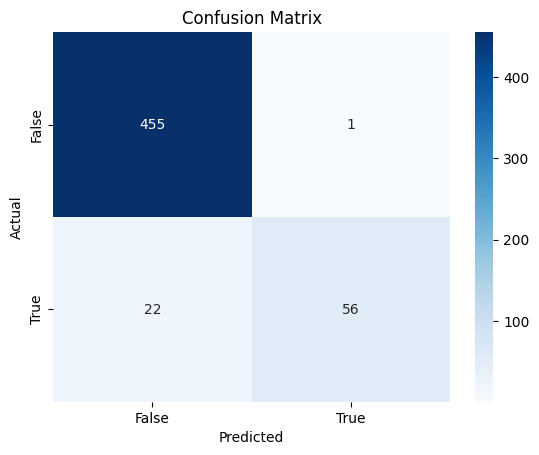

In [27]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_churn.classes_, yticklabels=le_churn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
print(f"\nOverall Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Overall Accuracy: 0.9569


# 6. Feature Importance Analysis

In [29]:
print("\n--- Feature Importance Analysis ---")


--- Feature Importance Analysis ---


In [30]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

In [31]:
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

In [32]:
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

In [33]:
print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))


Top 10 Most Important Features:
                   feature  importance
6         Total day charge    0.134758
4        Total day minutes    0.128899
16  Customer service calls    0.124618
1       International plan    0.089140
7        Total eve minutes    0.066796
9         Total eve charge    0.063965
14        Total intl calls    0.051858
15       Total intl charge    0.048100
13      Total intl minutes    0.046741
10     Total night minutes    0.045477


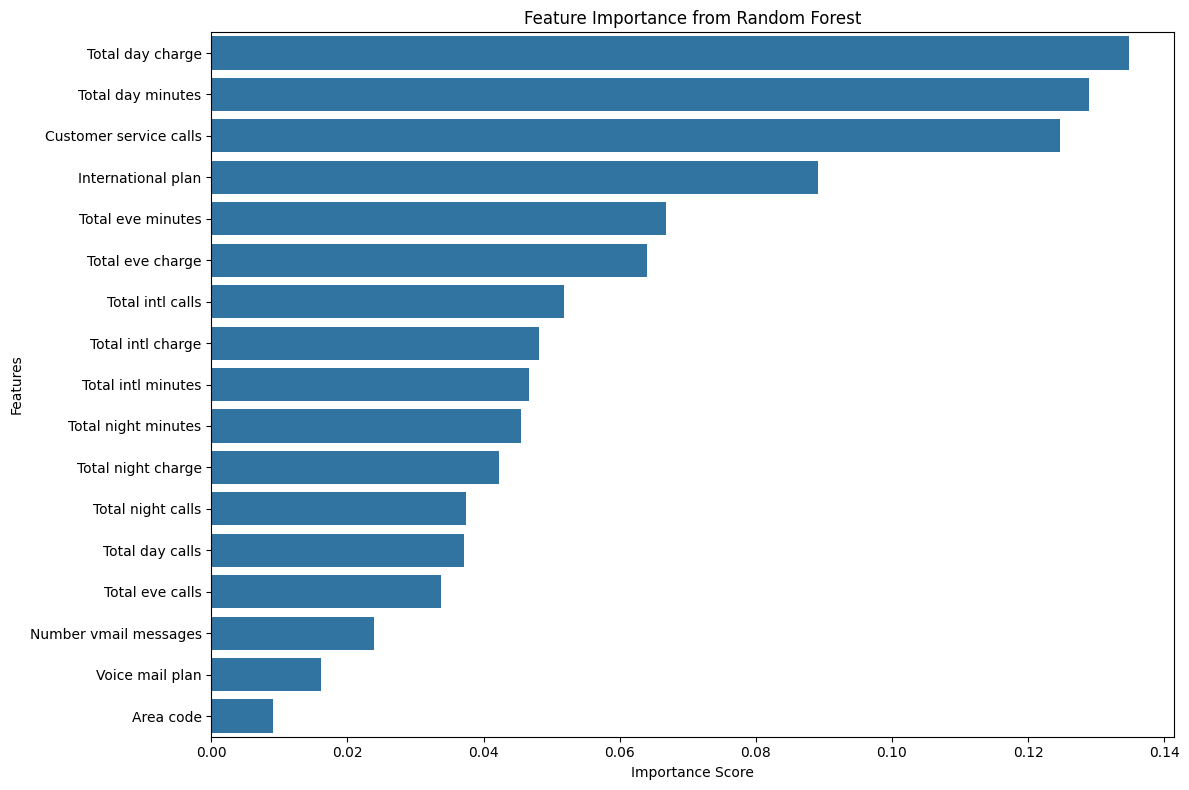

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()